# **Phishing Detection**


In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
from google.colab import files
import seaborn as sns
import io
seed=42
rnd=np.random.RandomState(seed)
Dim=2
W=16
# Uploading file from the local drive to Colab
print('Upload the Data')
File = files.upload()
Data=pd.read_csv(io.BytesIO(File['Phishing_dataset.csv']),header=0)

Upload the Data


Saving Phishing_dataset.csv to Phishing_dataset.csv


   Class Label  No of Training Example
0            1                    6157
1            0                    4898


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


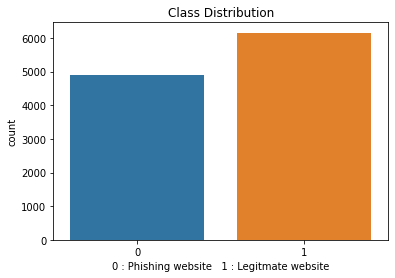

In [21]:
# Here + 1 represents legitmate website and 0 represent phishing website
import seaborn as sns
from collections import Counter
Data['Result']=Data['Result'].replace(-1,0)
Class_Counter=Counter(Data['Result'].values)
Class=pd.DataFrame(Class_Counter.most_common(),columns=['Class Label','No of Training Example'])
print(Class)
sns.countplot(Data['Result'])
plt.xlabel('0 : Phishing website   1 : Legitmate website')
plt.title('Class Distribution')
Class_Name=['Phishing URL','Legitmate URL']

In [210]:
Data1=Data
X=Data.drop(columns='Result')
X=X.drop(columns='index')
Y=Data['Result']

In [211]:
# Showing the 30 attributes
print(X.head(10).T)
#Data.describe()

                             0  1  2  3  4  5  6  7  8  9
having_IPhaving_IP_Address  -1  1  1  1  1 -1  1  1  1  1
URLURL_Length                1  1  0  0  0  0  0  0  0  1
Shortining_Service           1  1  1  1 -1 -1 -1  1 -1 -1
having_At_Symbol             1  1  1  1  1  1  1  1  1  1
double_slash_redirecting    -1  1  1  1  1 -1  1  1  1  1
Prefix_Suffix               -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
having_Sub_Domain           -1  0 -1 -1  1  1 -1 -1  1 -1
SSLfinal_State              -1  1 -1 -1  1  1 -1 -1  1  1
Domain_registeration_length -1 -1 -1  1 -1 -1  1  1 -1 -1
Favicon                      1  1  1  1  1  1  1  1  1  1
port                         1  1  1  1  1  1  1  1  1  1
HTTPS_token                 -1 -1 -1 -1  1 -1  1 -1 -1  1
Request_URL                  1  1  1 -1  1  1 -1 -1  1  1
URL_of_Anchor               -1  0  0  0  0  0 -1  0  0  0
Links_in_tags                1 -1 -1  0  0  0  0 -1  1  1
SFH                         -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
Submitting_to_

Text(0.5, 1.0, 'Correlation Matrix')

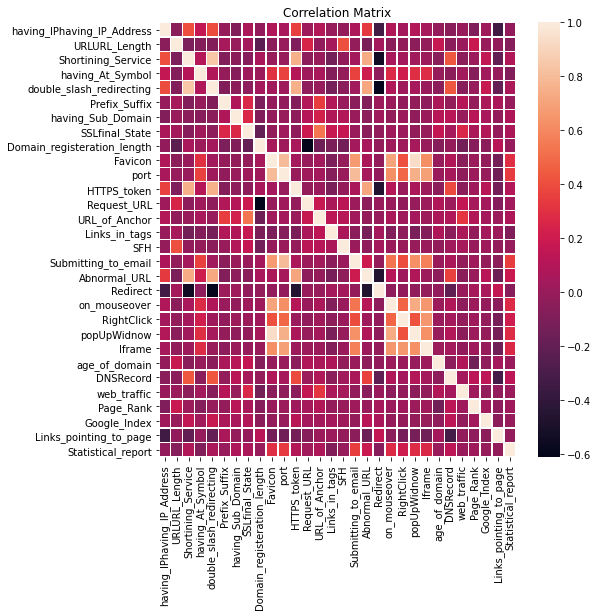

In [213]:
# Correlation between 30 attributes 
plt.figure(figsize=[8,8])
sns.heatmap(X.corr(),linewidths=0.5)
plt.title('Correlation Matrix')

In [154]:
# Splitting the data into train and test data set
X=Data.drop(columns='Result')
X=X.drop(columns='index')
Y=Data['Result']
from sklearn.model_selection import train_test_split
X_Train,X_Test,Y_Train,Y_Test=train_test_split(X,Y,test_size=0.2,random_state=rnd)
X_Train.shape

(8844, 30)

In [188]:
# Model Performance 
Model=[]
Train_Acc=[]
Test_Acc=[]
def store_Model(model,a,b):
  Model.append(model)
  Train_Acc.append(round(a,3))
  Test_Acc.append(round(b,3))

# **K-NN Classifier**

Accuracy of kNN on Test Data :0.9430122116689281
              precision    recall  f1-score   support

    Phishing       0.94      0.94      0.94      1010
   Legitmate       0.95      0.95      0.95      1201

    accuracy                           0.94      2211
   macro avg       0.94      0.94      0.94      2211
weighted avg       0.94      0.94      0.94      2211



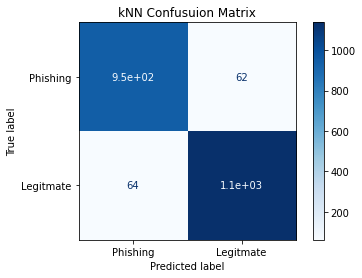

In [189]:
from sklearn.neighbors import KNeighborsClassifier
CLF=KNeighborsClassifier(n_neighbors=3)
CLF.fit(X_Train,Y_Train)
Pred_Y=CLF.predict(X_Test)
acc_Train=accuracy_score(CLF.predict(X_Train),Y_Train)
acc_Test=accuracy_score(Pred_Y,Y_Test)
plot_confusion_matrix(CLF,X_Test,Y_Test,display_labels=Class_Name,cmap=plt.cm.Blues)
plt.title('kNN Confusuion Matrix')
print('Accuracy of kNN on Test Data :' + str(accuracy_score(Pred_Y,Y_Test)))
print(classification_report(Y_Test,Pred_Y,target_names=Class_Name))
store_Model('kNN',acc_Train,acc_Test)

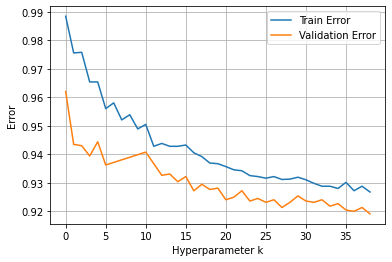

In [190]:
# Optimizing the Hyperparameter K (No of Nearest Neighbors)
Train_Err=[]
Test_Err=[]
for k in range(1,40):
  CLF=KNeighborsClassifier(n_neighbors=k)
  CLF.fit(X_Train,Y_Train)
  Pred_Y_T=CLF.predict(X_Train)
  Pred_Y=CLF.predict(X_Test)
  Train_Err.append(accuracy_score(Pred_Y_T,Y_Train))
  Test_Err.append(accuracy_score(Pred_Y,Y_Test))
plt.plot(Train_Err,label='Train Error')
plt.plot(Test_Err,label='Validation Error')
plt.xlabel('Hyperparameter k')
plt.ylabel('Error')
plt.legend()
plt.grid(True)


# **Logistic Regression**

Accuracy of Logistic Regression on Test Data:0.9222071460877431
              precision    recall  f1-score   support

    Phishing       0.93      0.90      0.91      1010
   Legitmate       0.92      0.94      0.93      1201

    accuracy                           0.92      2211
   macro avg       0.92      0.92      0.92      2211
weighted avg       0.92      0.92      0.92      2211



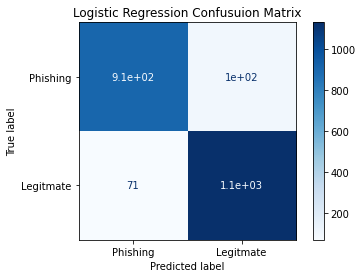

In [158]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix,accuracy_score,classification_report
CLF=LogisticRegression(solver='lbfgs', max_iter=1000)
CLF.fit(X_Train,Y_Train)
Pred_Y=CLF.predict(X_Test)
acc_Train=accuracy_score(CLF.predict(X_Train),Y_Train)
acc_Test=accuracy_score(Pred_Y,Y_Test)
plot_confusion_matrix(CLF,X_Test,Y_Test,display_labels=Class_Name,cmap=plt.cm.Blues)
plt.title('Logistic Regression Confusuion Matrix')
print('Accuracy of Logistic Regression on Test Data:' + str(accuracy_score(Pred_Y,Y_Test)))
print(classification_report(Y_Test,Pred_Y,target_names=Class_Name))
store_Model('Logistic Regression',acc_Train,acc_Test)

# **Naive Bayes**

Accuracy of Naive Bayes on Test Data :0.9050203527815468
              precision    recall  f1-score   support

    Phishing       0.90      0.90      0.90      1010
   Legitmate       0.91      0.91      0.91      1201

    accuracy                           0.91      2211
   macro avg       0.90      0.90      0.90      2211
weighted avg       0.91      0.91      0.91      2211



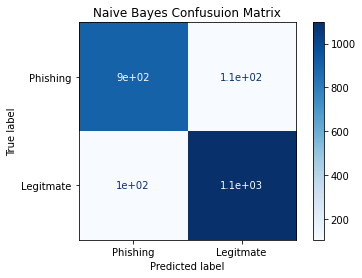

In [159]:
from sklearn.naive_bayes import BernoulliNB
CLF=BernoulliNB()
CLF.fit(X_Train,Y_Train)
Pred_Y=CLF.predict(X_Test)
acc_Train=accuracy_score(CLF.predict(X_Train),Y_Train)
acc_Test=accuracy_score(Pred_Y,Y_Test)
plot_confusion_matrix(CLF,X_Test,Y_Test,display_labels=Class_Name,cmap=plt.cm.Blues)
plt.title('Naive Bayes Confusuion Matrix')
print('Accuracy of Naive Bayes on Test Data :' + str(accuracy_score(Pred_Y,Y_Test)))
print(classification_report(Y_Test,Pred_Y,target_names=Class_Name))
store_Model('Naive Bayes',acc_Train,acc_Test)

# **Decision Tree**

Accuracy of Decision Tree on Test Data :0.9393939393939394
              precision    recall  f1-score   support

    Phishing       0.92      0.94      0.93      1010
   Legitmate       0.95      0.94      0.94      1201

    accuracy                           0.94      2211
   macro avg       0.94      0.94      0.94      2211
weighted avg       0.94      0.94      0.94      2211



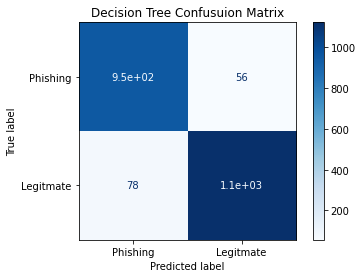

In [160]:
from sklearn.tree import DecisionTreeClassifier
CLF=DecisionTreeClassifier(max_depth=10)
CLF.fit(X_Train,Y_Train)
Pred_Y=CLF.predict(X_Test)
acc_Train=accuracy_score(CLF.predict(X_Train),Y_Train)
acc_Test=accuracy_score(Pred_Y,Y_Test)
plot_confusion_matrix(CLF,X_Test,Y_Test,display_labels=Class_Name,cmap=plt.cm.Blues)
plt.title('Decision Tree Confusuion Matrix')
print('Accuracy of Decision Tree on Test Data :' + str(accuracy_score(Pred_Y,Y_Test)))
print(classification_report(Y_Test,Pred_Y,target_names=Class_Name))
store_Model('Decision Tree',acc_Train,acc_Test)

# **Random Forest**

Accuracy of Random Forest on Test Data :0.9488919041157847
              precision    recall  f1-score   support

    Phishing       0.97      0.92      0.94      1010
   Legitmate       0.93      0.98      0.95      1201

    accuracy                           0.95      2211
   macro avg       0.95      0.95      0.95      2211
weighted avg       0.95      0.95      0.95      2211



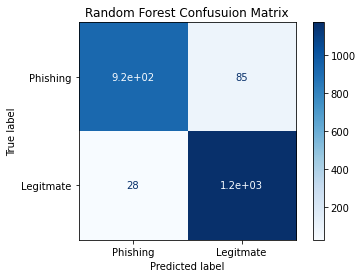

In [161]:
from sklearn.ensemble import RandomForestClassifier
CLF=RandomForestClassifier(max_depth=10)
CLF.fit(X_Train,Y_Train)
Pred_Y=CLF.predict(X_Test)
acc_Train=accuracy_score(CLF.predict(X_Train),Y_Train)
acc_Test=accuracy_score(Pred_Y,Y_Test)
plot_confusion_matrix(CLF,X_Test,Y_Test,display_labels=Class_Name,cmap=plt.cm.Blues)
plt.title('Random Forest Confusuion Matrix')
print('Accuracy of Random Forest on Test Data :' + str(accuracy_score(Pred_Y,Y_Test)))
print(classification_report(Y_Test,Pred_Y,target_names=Class_Name))
store_Model('Random Forest',acc_Train,acc_Test)


# **Support Vector Machine**

In [181]:
# Doing the Grid search to find the optimal value of the parameters  
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
Parameter={'C':[0.01,0.1,1,10,100],'kernel' : ['linear','poly','rbf']}
Grid=GridSearchCV(SVC(),Parameter,refit=True,verbose=2)
Grid.fit(X_Train,Y_Train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV] C=0.01, kernel=linear ...........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............................ C=0.01, kernel=linear, total=   0.7s
[CV] C=0.01, kernel=linear ...........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV] ............................ C=0.01, kernel=linear, total=   0.7s
[CV] C=0.01, kernel=linear ...........................................
[CV] ............................ C=0.01, kernel=linear, total=   0.7s
[CV] C=0.01, kernel=linear ...........................................
[CV] ............................ C=0.01, kernel=linear, total=   0.7s
[CV] C=0.01, kernel=linear ...........................................
[CV] ............................ C=0.01, kernel=linear, total=   0.7s
[CV] C=0.01, kernel=poly .............................................
[CV] .............................. C=0.01, kernel=poly, total=   2.2s
[CV] C=0.01, kernel=poly .............................................
[CV] .............................. C=0.01, kernel=poly, total=   2.2s
[CV] C=0.01, kernel=poly .............................................
[CV] .............................. C=0.01, kernel=poly, total=   2.2s
[CV] C=0.01, kernel=poly .............................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:  3.3min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'kernel': ['linear', 'poly', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [182]:
print(Grid.best_params_)

{'C': 100, 'kernel': 'rbf'}


In [202]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
X=np.array(X)
Y=np.array(Y)
kf = KFold(n_splits=5)
kf.get_n_splits(X)
names = ["Linear kernel SVM","Polynomial kernel SVM", "RBF kernel SVM"]
classifiers = [SVC(kernel="linear"),SVC(kernel="poly",degree=3),SVC(kernel="rbf")]
C=[0.01,0.1,1,10,100,1000]
K=5
Acc_Linear_T=[]
Acc_poly_T=[]
Acc_rbf_T=[]
Acc_Linear_V=[]
Acc_poly_V=[]
Acc_rbf_V=[]
k=1
for c in C:
  for name in names:
      Validation_Acc=[]
      Train_Acc=[]
      for train_index, test_index in kf.split(X):
          X_train, X_test = X[train_index], X[test_index]
          y_train, y_test = Y[train_index], Y[test_index]
          if name == "Linear kernel SVM":
             clf=SVC(kernel="linear",C=c)
             clf.fit(X_train, y_train)
             clf.score(X_train, y_train)
             Train_Acc.append(clf.score(X_train, y_train))
             Validation_Acc.append(clf.score(X_test, y_test))
          if name == "Polynomial kernel SVM":
             clf=SVC(kernel="poly",degree=3,C=c)
             clf.fit(X_train, y_train)
             clf.score(X_train, y_train)
             Train_Acc.append(clf.score(X_train, y_train))
             Validation_Acc.append(clf.score(X_test, y_test))
          if name == "RBF kernel SVM":
             clf=SVC(kernel="rbf",C=c)
             clf.fit(X_train, y_train)
             clf.score(X_train, y_train)
             Train_Acc.append(clf.score(X_train, y_train))
             Validation_Acc.append(clf.score(X_test, y_test))
      print('For C = '+ str(c)+'  '+'Validation Error '+ name +' : ' +str(np.mean(Validation_Acc)))
      print('For C = '+ str(c)+'  '+'Trainning Error '+ name +' : ' +str(np.mean(Train_Acc)))
      if name == "Linear kernel SVM":
        Acc_Linear_T.append(np.mean(Train_Acc))
        Acc_Linear_V.append(np.mean(Validation_Acc))
      if name == "Polynomial kernel SVM":
        Acc_poly_T.append(np.mean(Train_Acc))
        Acc_poly_V.append(np.mean(Validation_Acc))
      if name == "RBF kernel SVM":
        Acc_rbf_T.append(np.mean(Train_Acc))
        Acc_rbf_V.append(np.mean(Validation_Acc))
      print('----------------------------------------------------------------------------------------')

For C = 0.01  Validation Error Linear kernel SVM : 0.9218453188602442
For C = 0.01  Trainning Error Linear kernel SVM : 0.9251243781094527
----------------------------------------------------------------------------------------
For C = 0.01  Validation Error Polynomial kernel SVM : 0.9074626865671641
For C = 0.01  Trainning Error Polynomial kernel SVM : 0.9128674807779286
----------------------------------------------------------------------------------------
For C = 0.01  Validation Error RBF kernel SVM : 0.9071008593396653
For C = 0.01  Trainning Error RBF kernel SVM : 0.9103573043871551
----------------------------------------------------------------------------------------
For C = 0.1  Validation Error Linear kernel SVM : 0.926096788783356
For C = 0.1  Trainning Error Linear kernel SVM : 0.9283355947535051
----------------------------------------------------------------------------------------
For C = 0.1  Validation Error Polynomial kernel SVM : 0.9347806422433287
For C = 0.1  Tra

Text(0.5, 1.0, 'RBF Kernel SVM')

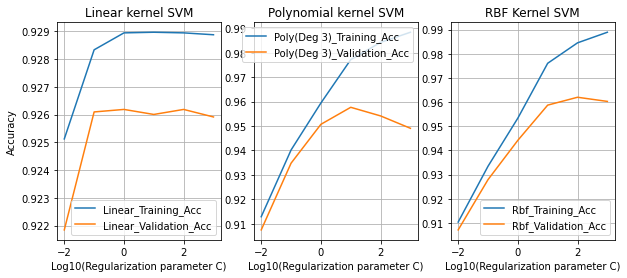

In [208]:
import math
plt.figure(figsize=[10,4])
plt.subplot(1,3,1)
plt.plot(np.log10(C),Acc_Linear_T,label='Linear_Training_Acc')
plt.plot(np.log10(C),Acc_Linear_V,label='Linear_Validation_Acc')
plt.grid(True)
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Log10(Regularization parameter C)')
plt.title('Linear kernel SVM')
plt.subplot(1,3,2)
plt.plot(np.log10(C),Acc_poly_T,label='Poly(Deg 3)_Training_Acc')
plt.plot(np.log10(C),Acc_poly_V,label='Poly(Deg 3)_Validation_Acc')
plt.grid(True)
plt.legend()
plt.xlabel('Log10(Regularization parameter C)')
plt.title('Polynomial kernel SVM')
plt.subplot(1,3,3)
plt.plot(np.log10(C),Acc_rbf_T,label='Rbf_Training_Acc')
plt.plot(np.log10(C),Acc_rbf_V,label='Rbf_Validation_Acc')
plt.grid(True)
plt.legend()
plt.xlabel('Log10(Regularization parameter C)')
plt.title('RBF Kernel SVM')

Accuracy of SVM on Test Data :0.9647218453188603
              precision    recall  f1-score   support

    Phishing       0.97      0.95      0.96      1010
   Legitmate       0.96      0.98      0.97      1201

    accuracy                           0.96      2211
   macro avg       0.97      0.96      0.96      2211
weighted avg       0.96      0.96      0.96      2211



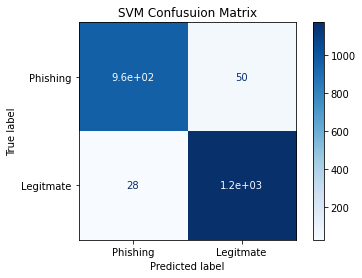

In [204]:
CLF=SVC(kernel="rbf",C=100)
CLF.fit(X_Train,Y_Train)
Pred_Y=CLF.predict(X_Test)
acc_Train=accuracy_score(CLF.predict(X_Train),Y_Train)
acc_Test=accuracy_score(Pred_Y,Y_Test)
plot_confusion_matrix(CLF,X_Test,Y_Test,display_labels=Class_Name,cmap=plt.cm.Blues)
plt.title('SVM Confusuion Matrix')
print('Accuracy of SVM on Test Data :' + str(accuracy_score(Pred_Y,Y_Test)))
print(classification_report(Y_Test,Pred_Y,target_names=Class_Name))
store_Model('SVM',acc_Train,acc_Test)

# **Multi Layer Perceptron**

Accuracy of MLP on Test Data :0.9696969696969697
              precision    recall  f1-score   support

    Phishing       0.98      0.95      0.97      1010
   Legitmate       0.96      0.99      0.97      1201

    accuracy                           0.97      2211
   macro avg       0.97      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211



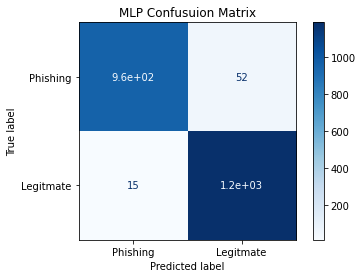

In [186]:
#define the 784 X 256 X 128 X 10
from sklearn.neural_network import MLPClassifier
CLF=MLPClassifier(alpha=0.01,hidden_layer_sizes=([100,50,25]))
CLF.fit(X_Train,Y_Train)
Pred_Y=CLF.predict(X_Test)
acc_Train=accuracy_score(CLF.predict(X_Train),Y_Train)
acc_Test=accuracy_score(Pred_Y,Y_Test)
plot_confusion_matrix(CLF,X_Test,Y_Test,display_labels=Class_Name,cmap=plt.cm.Blues)
plt.title('MLP Confusuion Matrix')
print('Accuracy of MLP on Test Data :' + str(accuracy_score(Pred_Y,Y_Test)))
print(classification_report(Y_Test,Pred_Y,target_names=Class_Name))
store_Model('MLP',acc_Train,acc_Test)

# **XGBoost Classifier**

Accuracy of XGBoost on Test Data :0.9294436906377205
              precision    recall  f1-score   support

    Phishing       0.96      0.88      0.92      1010
   Legitmate       0.91      0.97      0.94      1201

    accuracy                           0.93      2211
   macro avg       0.93      0.93      0.93      2211
weighted avg       0.93      0.93      0.93      2211



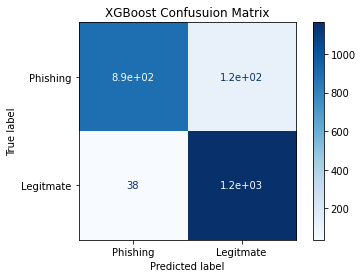

In [166]:
from xgboost import XGBClassifier
CLF=XGBClassifier(learning_rate=0.01,max_depth=5)
CLF.fit(X_Train,Y_Train)
Pred_Y=CLF.predict(X_Test)
acc_Train=accuracy_score(CLF.predict(X_Train),Y_Train)
acc_Test=accuracy_score(Pred_Y,Y_Test)
plot_confusion_matrix(CLF,X_Test,Y_Test,display_labels=Class_Name,cmap=plt.cm.Blues)
plt.title('XGBoost Confusuion Matrix')
print('Accuracy of XGBoost on Test Data :' + str(accuracy_score(Pred_Y,Y_Test)))
print(classification_report(Y_Test,Pred_Y,target_names=Class_Name))
store_Model('XGBoost',acc_Train,acc_Test)


# **Performance Comparision between Different Machine Learning Techniques**

In [187]:
Performance=pd.DataFrame({'ML Model' : Model,'Train_Accuracy' : Train_Acc,'Test_Accuracy' : Test_Acc})
Performance.sort_values(by=['Test_Accuracy','Train_Accuracy'],ascending =False)


,ML Model,Train_Accuracy,Test_Accuracy
9,MLP,0.989,0.970
6,MLP,0.988,0.966
5,SVM,0.985,0.965
8,SVM,0.985,0.965
4,Random Forest,0.956,0.949
0,kNN,0.976,0.943
3,Decision Tree,0.963,0.939
7,XGBoost,0.929,0.929
1,Logistic Regression,0.929,0.922
2,Naive Bayes,0.906,0.905
